In [ ]:
# 

In [45]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import src.const as const
import src.utils.data_utils as data_utils
import src.utils.plot_utils as plot_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
plot_utils.setup_mpl()
height, width = plot_utils.PARAMS['hight_inch'], plot_utils.PARAMS['width_inch']

In [2]:
const.logger.info("Starting the program")

2024-04-20 01:27:55.684 | INFO     | __main__:<module>:1 - Starting the program


In [6]:
graph, adj, features, labels = data_utils.load_data_airport(const.PATH_DATA, return_label=True)

In [16]:
# log basic statistics
const.logger.info(f"Number of nodes: {graph.number_of_nodes()}, Number of edges: {graph.number_of_edges()}, Number of features: {features.shape[1]}, Number of classes: {len(set(labels))}")

2024-04-20 01:33:47.269 | INFO     | __main__:<module>:2 - Number of nodes: 3188, Number of edges: 18631, Number of features: 4, Number of classes: 4


Text(0, 0.5, 'Fraction $p_k$ of Nodes with Degree k')

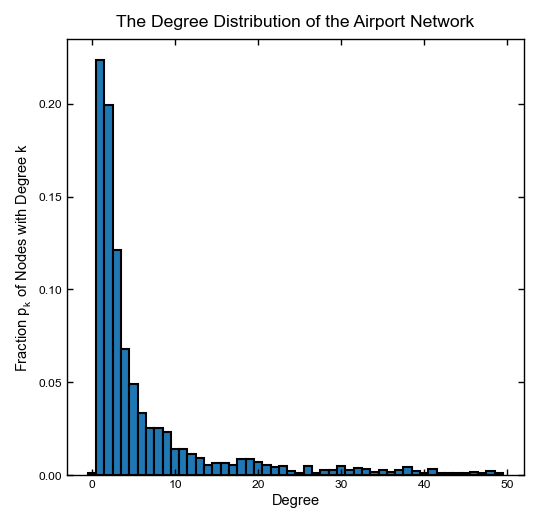

In [85]:
## degree distribution
degrees = [val for (node, val) in graph.degree()]
# fraction of nodes with a given degree
degree_freq = np.bincount(degrees)
# degree_freq = degree_freq / degree_freq.sum() # 不好理解，其实是除以节点数
degree_dist = degree_freq/graph.number_of_nodes()

# bar plot degree distribution
fig, ax = plt.subplots(figsize=(height, width),dpi=150)
ax.bar(range(0,50), degree_dist[:50], width=1.0, edgecolor='black')
ax.set_title("The Degree Distribution of the Airport Network")
ax.set_xlabel("Degree")
ax.set_ylabel("Fraction $p_k$ of Nodes with Degree k")


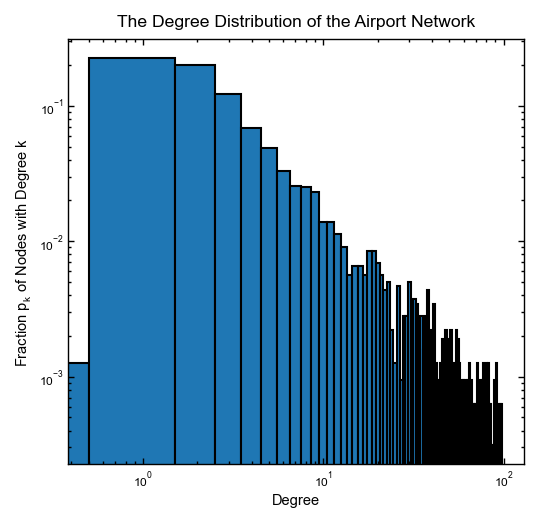

In [87]:
fig, ax = plt.subplots(figsize=(height, width),dpi=150)
ax.bar(range(0,100), degree_dist[:100], width=1.0, edgecolor='black')
ax.set_title("The Degree Distribution of the Airport Network")
ax.set_xlabel("Degree")
ax.set_ylabel("Fraction $p_k$ of Nodes with Degree k")
ax.set_xscale('log')
ax.set_yscale('log')

- 度分布
    - 度分布是指网络中节点的度的概率
        - y轴是概率，x轴是度
    - 计算度分布每个度的频数是除以总节点数，不是除以度的和
    - $\Sigma p_k = 1$
    - 一般将$p_k$表达成k的关系式
    - 横轴的单位一般为1，因为度是离散的
- 有向网络的度分布
    - 分为进度和出度
    - 可以用联合概率分布，密度图，surface plot刻画
